# **Visualización para análisis exporatorio**
# AE08. Seaborn Violin y Lineplot

Veamos dos nuevos tipos de gráficos en Seaborn; uno de ellos, llamado gráfico de violín, es muy característico de esta librería.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [ ]:
#path1 = '/content/drive/MyDrive/TalentoDigital_Mk_III/Material_clases_CD_AD/M03-Analisis_exploratorio_estadistica/Archivos/VD02.csv'
path1 = 'VD02.csv'
penguins_df = pd.read_csv(path1).dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [ ]:
#path2 = "/content/drive/MyDrive/TalentoDigital_Mk_III/Material_clases_CD_AD/M03-Analisis_exploratorio_estadistica/Archivos/VD05.csv"
path2 = "VD05.csv"
temps_df = pd.read_csv(path2)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
2155,2155,IDCJAC0010,86338,2019,11,27,24.8,1.0,N,melbourne,2019-11-27
2916,2916,IDCJAC0010,66062,2019,12,28,28.7,1.0,N,sydney,2019-12-28
788,788,IDCJAC0010,70351,2019,2,28,32.6,1.0,Y,canberra,2019-02-28
2492,2492,IDCJAC0010,9225,2019,10,30,22.0,1.0,Y,perth,2019-10-30
2154,2154,IDCJAC0010,86338,2019,11,26,16.4,1.0,N,melbourne,2019-11-26


## <font color='blue'>__Diagramas de violín (violinplots)__</font>

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X, y=Y, data=df)`.

<img src="https://drive.google.com/uc?id=1kQTLE-_L-eZT2TfRaazRMTH5tpg8R3Gi">

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


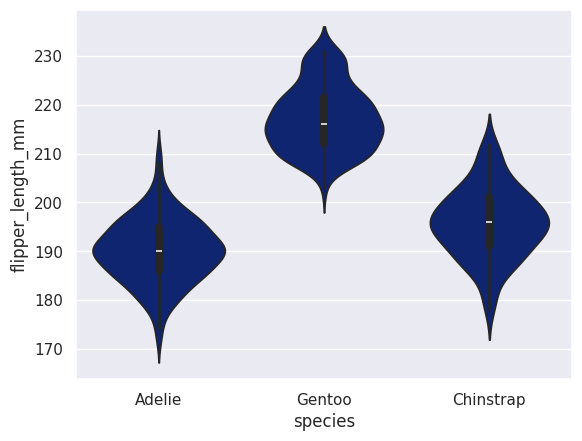

In [ ]:
sns.violinplot(x='species', y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

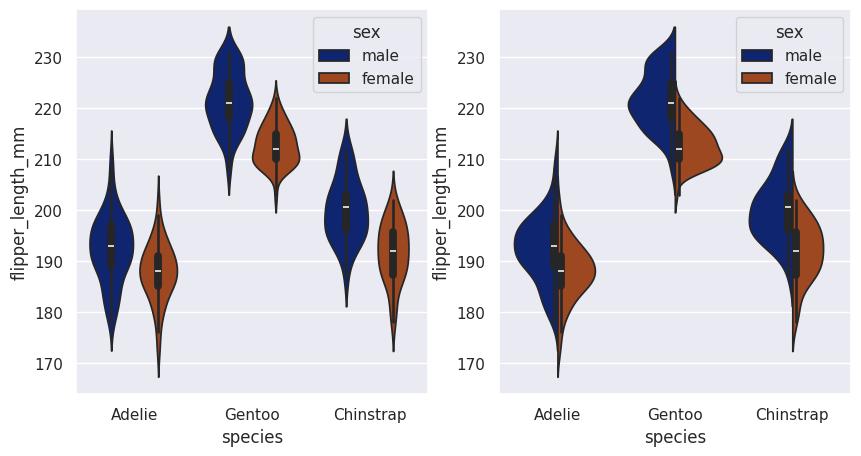

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', split=True, ax = ax[1])
plt.show()

## <font color='blue'>__Diagramas de Líneas (lineplot)__</font>

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `Seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día).

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


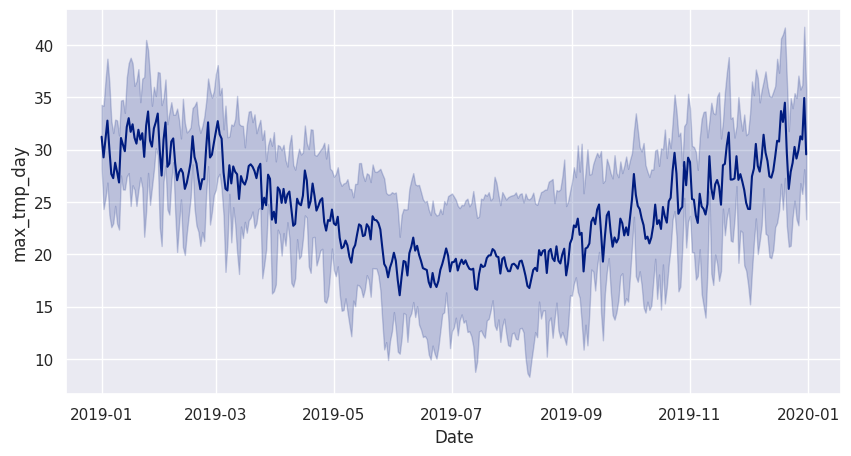

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, errorbar='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica revisitaremos el set de datos de precios de casa de King County Housing (VD08.csv). Realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [ ]:
#path3 = "/content/drive/MyDrive/TalentoDigital_Mk_III/Material_clases_CD_AD/M03-Analisis_exploratorio_estadistica/Archivos/VD08.csv"
path3 = "VD08.csv"
housing_df = pd.read_csv(path3)
housing_df.head()

# Tu código aquí ...


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


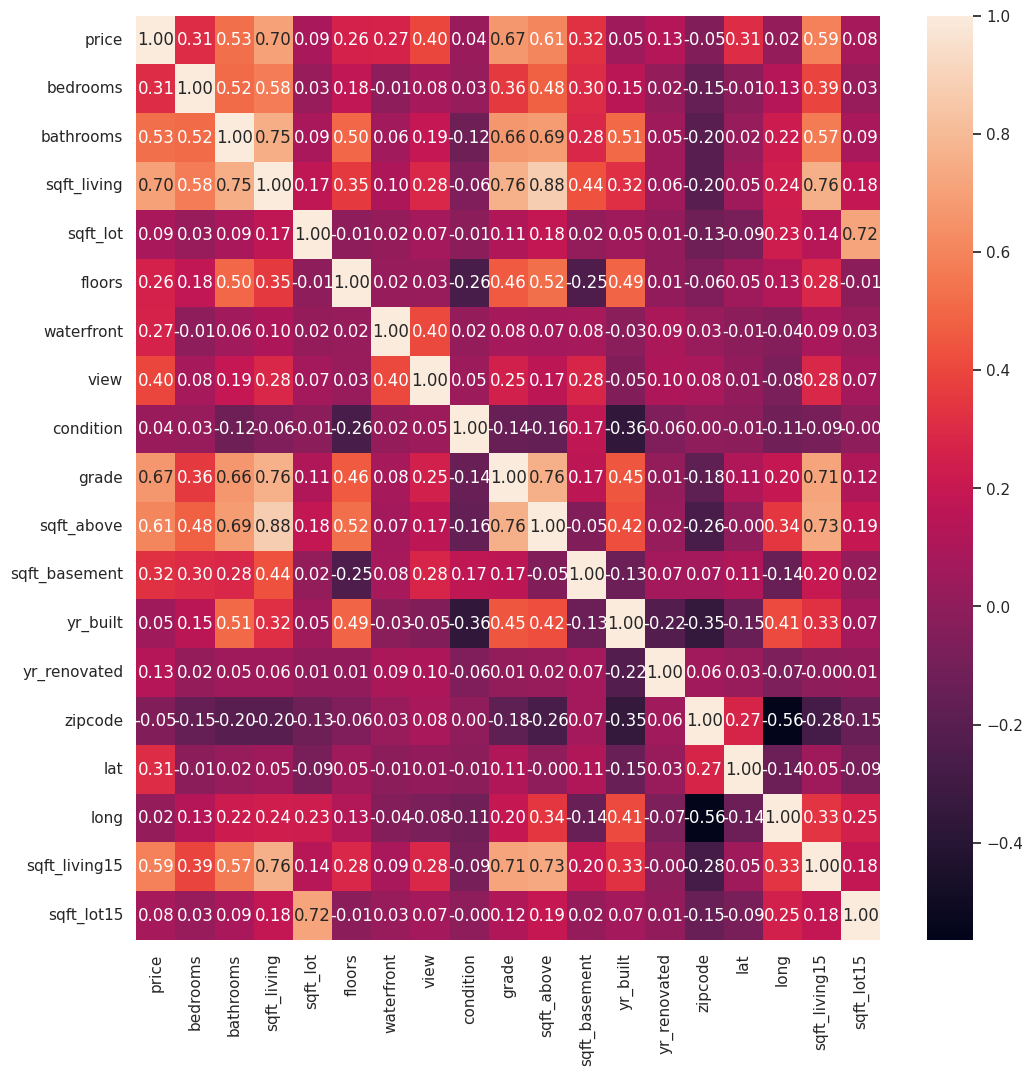

In [ ]:
# 1. Graficar la matriz de correlación para las distintas variables numéricas.
# nota: el parámetro fmt='.2f' transformara el texto de anotaciones a 2 decimales máximo

# Ajustamos paleta de colores pare visualizar mejor las líneas.
sns.set(context='notebook', style='darkgrid', palette='pastel')

# Matriz de Correlación
corr = housing_df.corr(numeric_only=True) # Obtenemos la matriz de correlación para las variables númericas del set de datos

#Excluimos la variable 'id', por corresponder a una variable categórica.
corr = corr.drop('id', axis=0)
corr = corr.drop('id', axis=1)

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f') #Generamos el heatmap

plt.show()

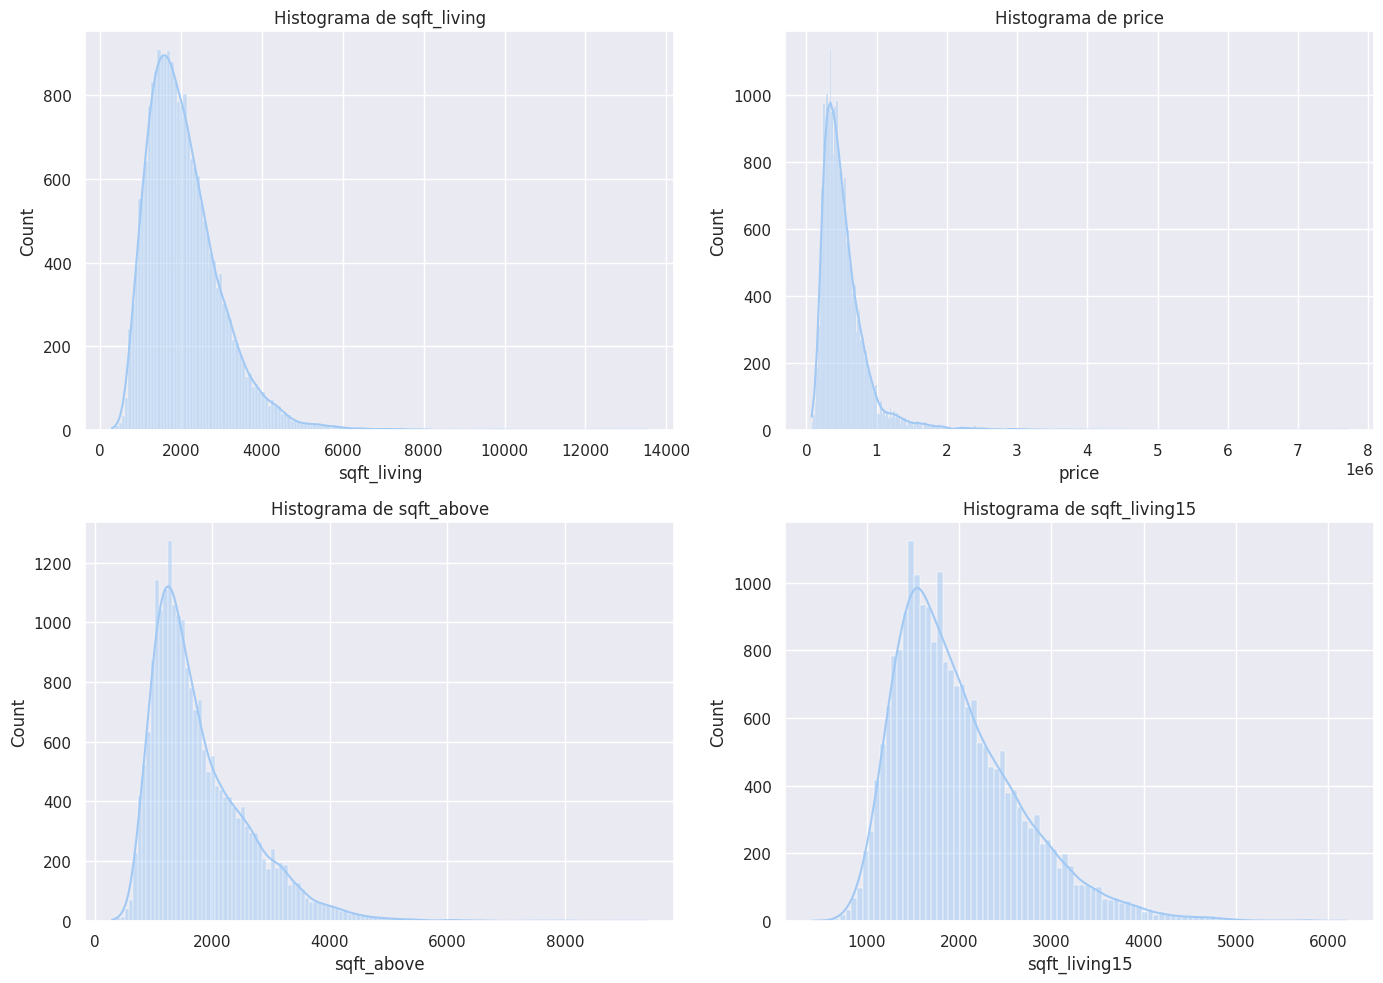

In [ ]:
# 2. Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

# Seteo del Figure
plt.figure(figsize=(14, 10))

# Histplot: sqft_living
plt.subplot(2, 2, 1)
sns.histplot(x='sqft_living', data = housing_df, kde=True)
plt.title('Histograma de sqft_living')

# Histplot: price
plt.subplot(2, 2, 2)
sns.histplot(x='price', data = housing_df, kde=True)
plt.title('Histograma de price')

# Histplot: sqft_above
plt.subplot(2, 2, 3)
sns.histplot(x='sqft_above', data = housing_df, kde=True)
plt.title('Histograma de sqft_above')

# Histplot: sqft_living15
plt.subplot(2, 2, 4)
sns.histplot(x='sqft_living15', data = housing_df, kde=True)
plt.title('Histograma de sqft_living15')

plt.tight_layout()
plt.show()

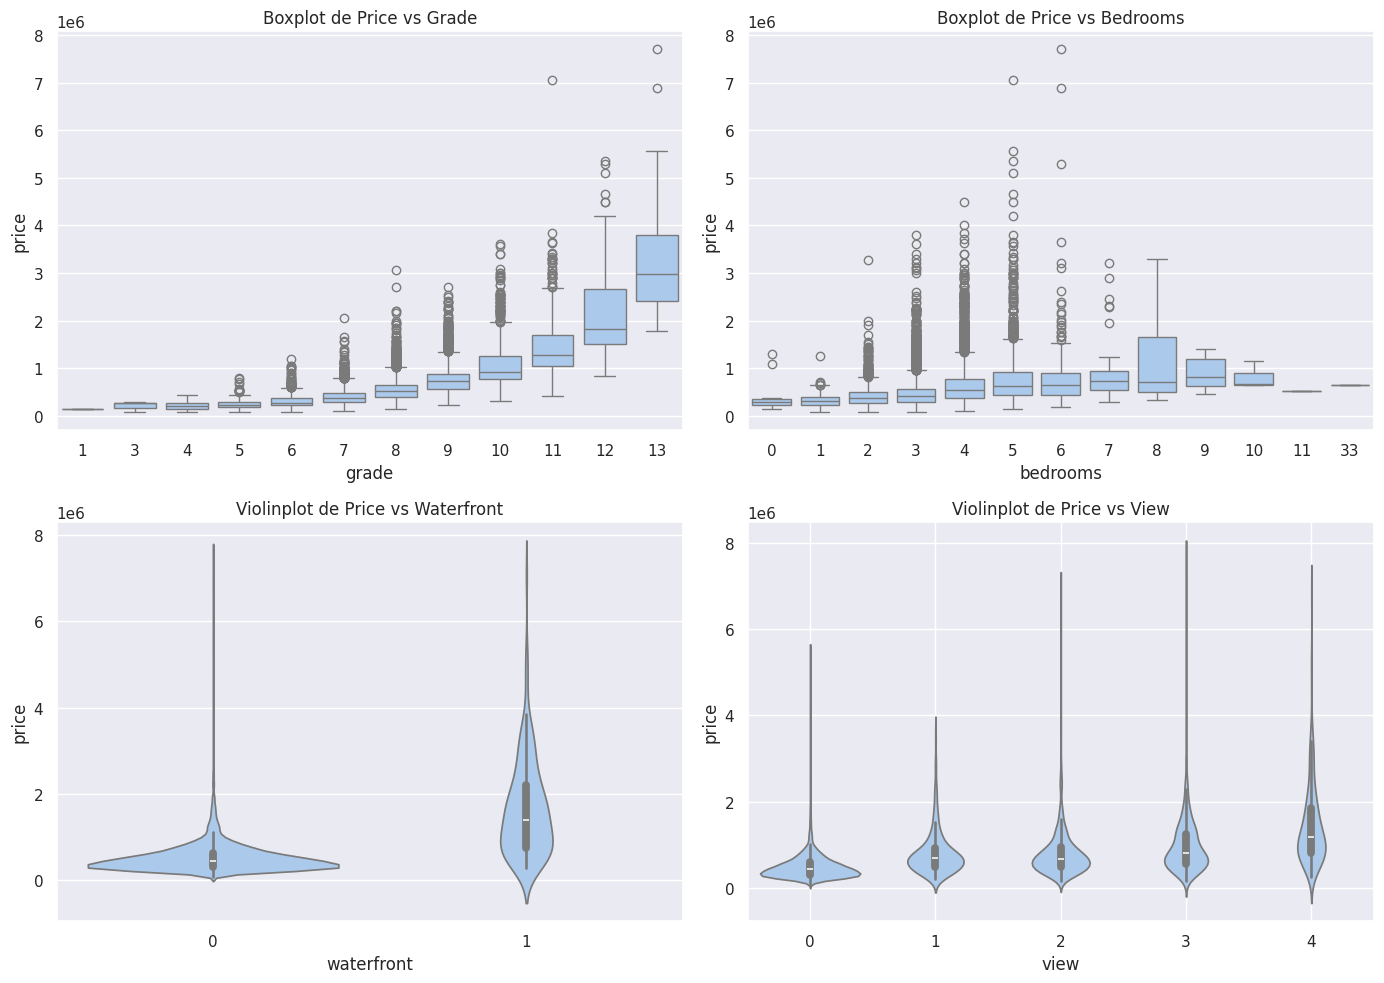

In [ ]:
# 3. Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables
 #(como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). ¿Qué puede observar de esto?

# Seteo del Figure
plt.figure(figsize=(14, 10))

# Boxplot: price vs grade
plt.subplot(2, 2, 1)
sns.boxplot(x='grade', y='price', data=housing_df)
plt.title('Boxplot de Price vs Grade')

# Boxplot: price vs bedrooms
plt.subplot(2, 2, 2)
sns.boxplot(x='bedrooms', y='price', data=housing_df)
plt.title('Boxplot de Price vs Bedrooms')

# Violinplot: price vs waterfront
plt.subplot(2, 2, 3)
sns.violinplot(x='waterfront', y='price', data=housing_df)
plt.title('Violinplot de Price vs Waterfront')

# Violinplot: price vs view
plt.subplot(2, 2, 4)
sns.violinplot(x='view', y='price', data=housing_df)
plt.title('Violinplot de Price vs View')
#plt.xlabel('Year Built')
#plt.ylabel('Average Price')
plt.grid(True)

plt.tight_layout()
plt.show()

Estos gráficos muestran la influencia de distintas variables en el precio de las viviendas:

* Parámetro **grade**: Este gráfico muestra que a medida que aumenta la calidad de la construcción reflejada en este parámetro, el precio medio y la dispersión del precio también aumentan. Claramente propiedades de mejor calidad tienden a ser más caras.

* Parámetro **bedrooms**: La cantidad de habitaciones afecta el precio, pero la relación no es tán directa, por lo que debe estar afectada por la concurrencia de otras variables. La variabilidad de los precios tiende aumentar a medida que aumenta el número de piezas.

* Parámetro **waterfront**: Las propiedades con "acceso a  cuerpo de agua" muestran una variabilidad de precios más amplia, y en general niveles de precio más altos que aquellas propiedades que no están frente al agua.

* Parámetro **view**:  La variable vista parece tener una influencia positiva pero moderada en el precio. Se observan medianas similares en el nivel de 2 a 4 vistas, pero la variabilidad aumenta con el número de vistas.


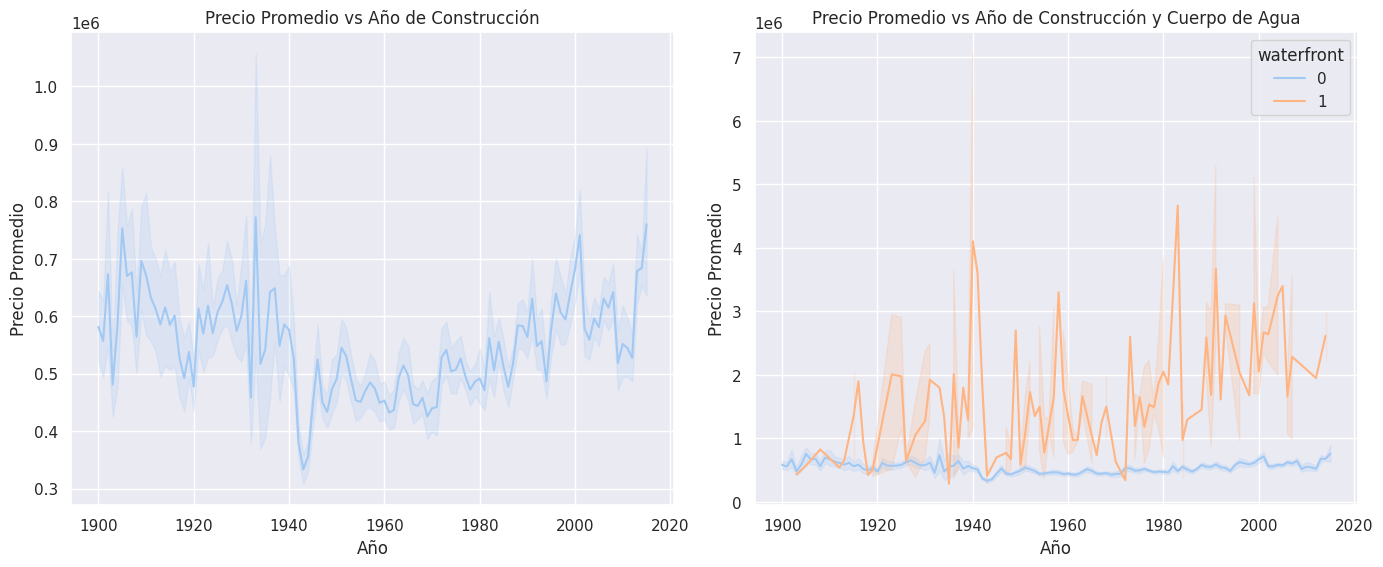

In [ ]:
# 4. Utilizando subplots, genere 2 lineplots
#   Precio de las casas a través de los años que fueron construidas
#   Precio de las casas a través de los años que fueron construidas pero separadas por la columna waterfront

# Seteo del Figure
plt.figure(figsize=(14, 6))

# Lineplot: Precio de las casas según el año de construcción (se considera el valor promedio de los precios)
plt.subplot(1, 2, 1)
sns.lineplot(data=housing_df, x='yr_built', y='price', estimator='mean')
plt.title('Precio Promedio vs Año de Construcción')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

# Lineplot: Precio de las casas según el año de construcción, separado por "vista al agua"
plt.subplot(1, 2, 2)
sns.lineplot(data=housing_df, x='yr_built', y='price', hue='waterfront', estimator='mean')
plt.title("Precio Promedio vs Año de Construcción y Cuerpo de Agua")
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

plt.tight_layout()
plt.show()

* El primer gráfico de Precio Promedio vs Año de Construcción, muestra que  existen fluctuaciones en el precio que pueden deberse a las características constructivas de cada época. Una hipótesis es que las casas posteriores a la Segunda Guerra se ven con un menor valor que las anteriores, y podría deberse a la reducción de dimensiones, terrenos, e industrialización en la construcción. Sin embargo, en los últimos decenios se aprecia una tenedencia al alza.

* El segundo gráfico muestra el Precio Promedio por Año de Construcción, pero incorporando una distinción entre aquellas con y sin acceso a "cuerpo de agua". Es muy nítido que las propiedades con acceso a agua tienen un nivel de precios más altos que aquellos que no lo tienen, tendencia que es casi independiente de su año de construcción.

<font color='green'>Fin actividad 1</font>

## <font color='purple'> __EXPERIMENTO__: </font>
### Variante para construir la red de subgráficos

En el siguiente código, se resuelve el problema planteado en las Partes 2 y 3 de la actividad, usando el método plt.subplot, que retorna un objeto `figure` y una lista de objetos `axes`.


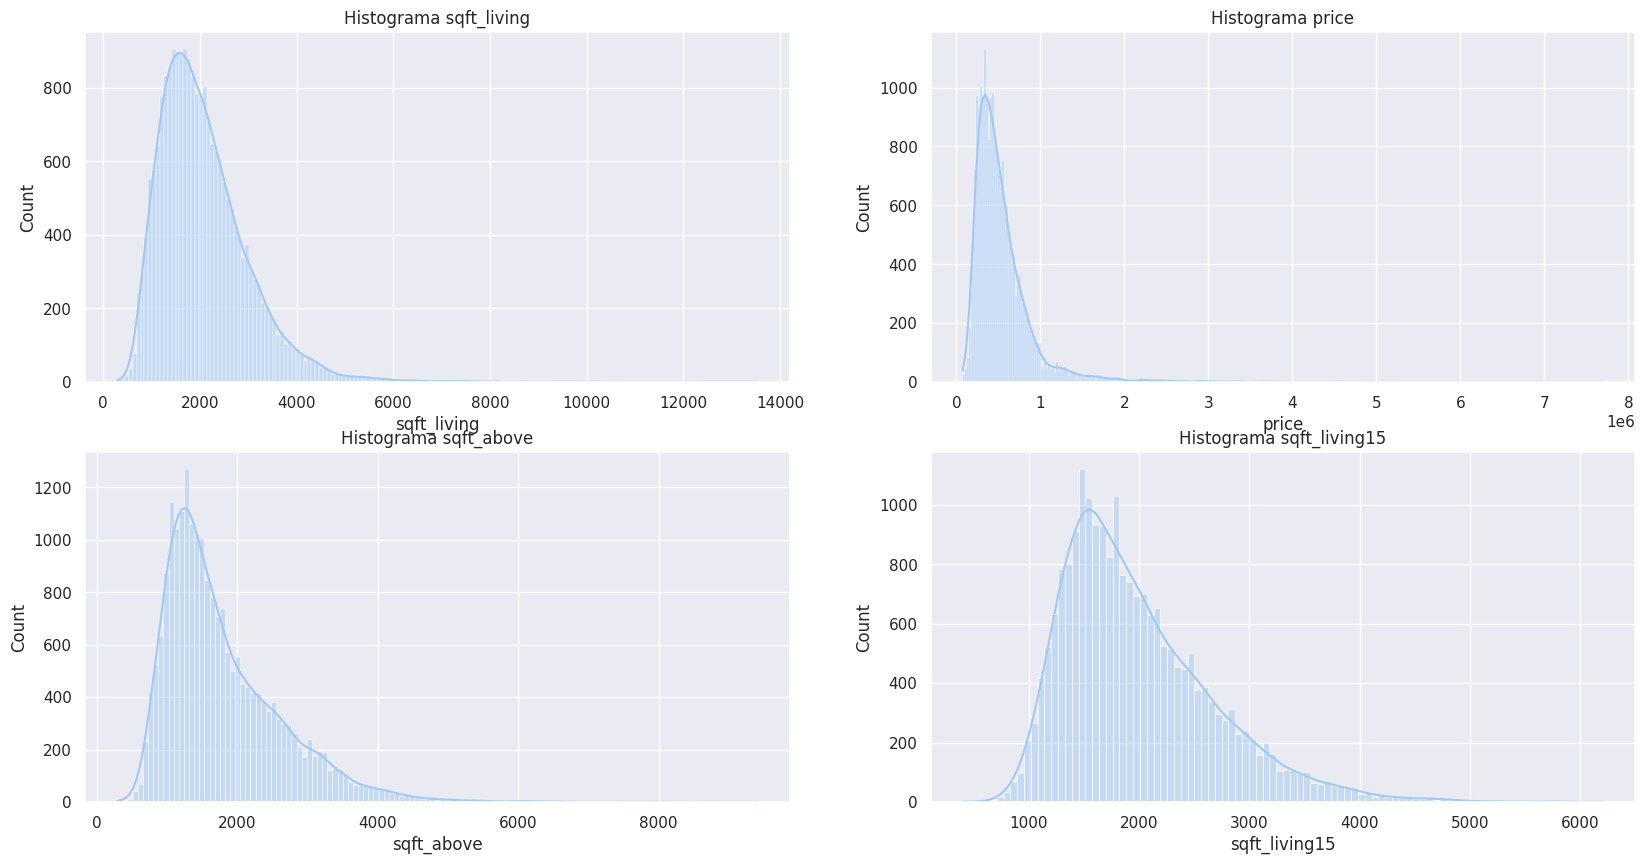

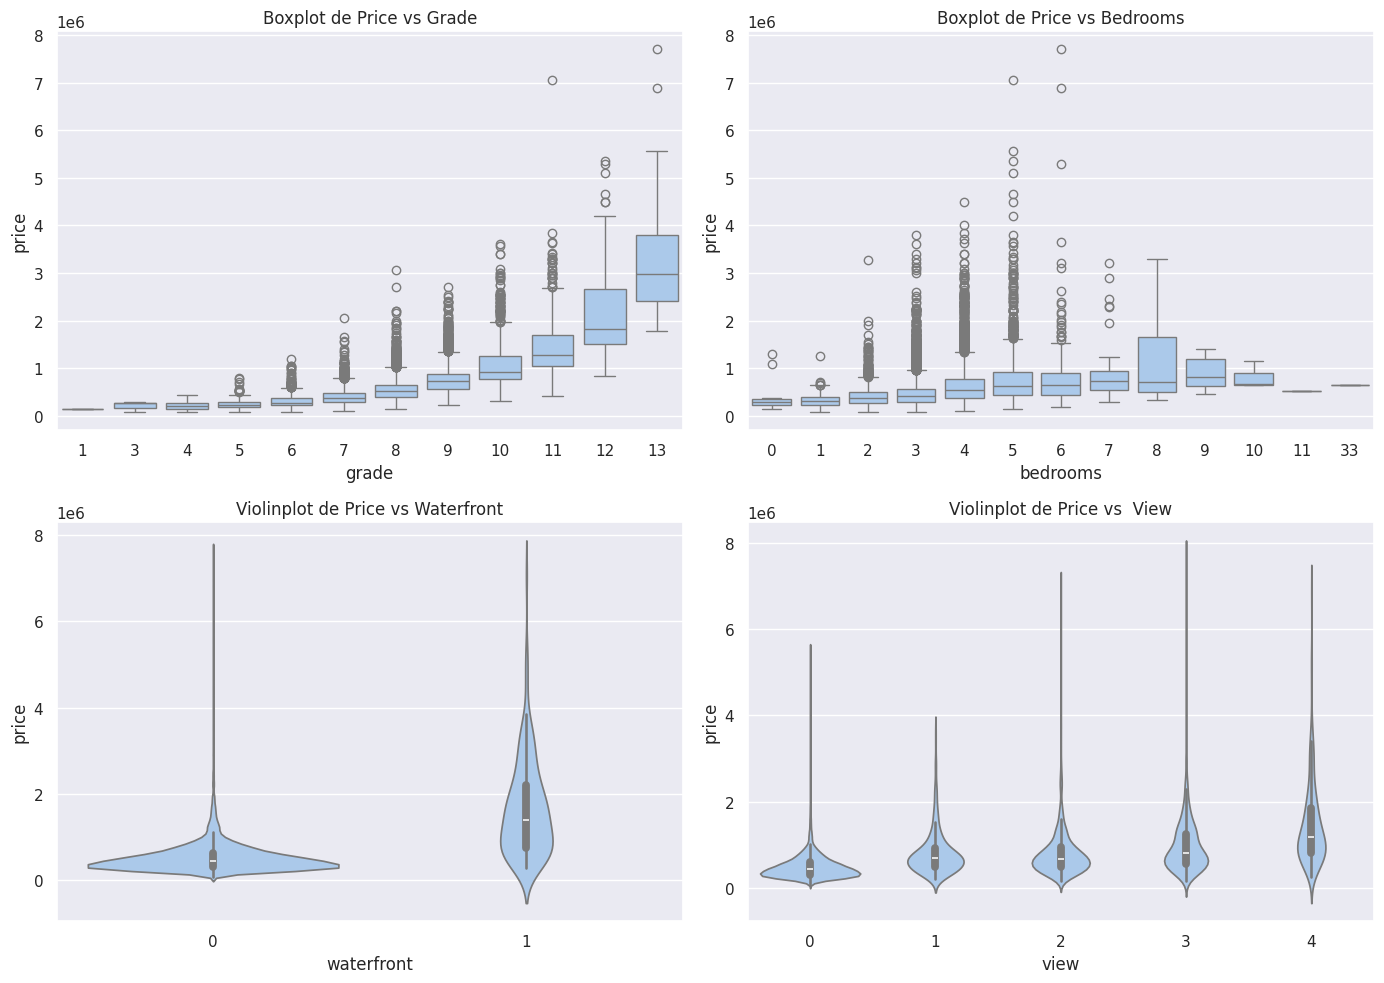

In [ ]:
# 2. Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

fig, ax = plt.subplots(2,2, figsize=(20,10) )
# subplots con el método histoplot  y el gráfico de KDE
sns.histplot(x='sqft_living', data = housing_df, kde=True, ax = ax[0,0])
ax[0,0].set_title(f'Histograma sqft_living')
sns.histplot(x='price', data = housing_df, kde=True, ax = ax[0,1])
ax[0,1].set_title(f'Histograma price')
sns.histplot(x='sqft_above', data = housing_df, kde=True, ax = ax[1,0])
ax[1,0].set_title(f'Histograma sqft_above')
sns.histplot(x='sqft_living15', data = housing_df, kde=True, ax = ax[1,1])
ax[1,1].set_title(f'Histograma sqft_living15')

plt.show()

# 3. Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables
 #(como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). ¿Qué puede observar de esto?


fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='grade', y='price', data=housing_df, ax = ax[0,0])
ax[0,0].set_title(f'Boxplot de Price vs Grade')
sns.boxplot(x='bedrooms', y='price', data=housing_df, ax = ax[0,1])
ax[0,1].set_title(f'Boxplot de Price vs Bedrooms')
sns.violinplot(x='waterfront', y='price', data=housing_df, ax = ax[1,0])
ax[1,0].set_title(f'Violinplot de Price vs Waterfront')
sns.violinplot(x='view', y='price', data=housing_df, ax = ax[1,1])
ax[1,1].set_title(f'Violinplot de Price vs  View')

plt.tight_layout()
plt.show()

### <font color='purple'>Fin experimento </font>


## <font color='purple'>__MATERIAL ADICIONAL__</font>
En este link se describen 2 formas de dibujar en `seaborn`:
* a nivel figura
* a nivel eje

A nivel figura, `seaborn` gestiona automáticamente la creación de figuras y ejes, ideal para generar gráficos complejos de forma sencilla mediante métodos como `relplot`, `distplot` y `catplot`. A nivel eje, el usuario tiene control total sobre cada gráfico, al estilo de `Matplotlib`, con la capacidad de dibujar en ejes individuales.

Se explican las ventajas y situaciones para usar cada método. A nivel figura es más simple y menos parametrizable, mientras que a nivel eje es más complejo pero permite un mayor control. Se introducen los tres principales tipos de gráficas en Seaborn: **distribución, relacionales y categóricas**.



### Link: [Dibujando con seaborn](https://youtu.be/VzBHAF8edvQ)


### <font color='purple'>Fin material adicional </font>